# Logistic Regression With Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from math import log
from random import *

In [2]:
## Creating a Random Data Set For Logistic Regression
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=100,n_features=2,centers=2,cluster_std=1.05,random_state=20)
X=np.column_stack((np.ones(shape=y.shape),x))


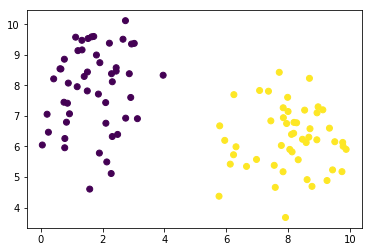

In [3]:
## Ploting of Independent Variable
plt.scatter(X[:,1],X[:,2],marker='o',c=y)


In [4]:
## Theta is a Initialization of theta0,theta1 and theta2 we can Also proceed with 0.
theta=np.random.uniform(size=X.shape[1])
theta


array([0.95244716, 0.47172251, 0.62523092])

In [5]:
## Creating Sigmoid Function
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [6]:
#sigmoid(z=5.159315207350552)

In [7]:
def predict(X,theta):
    y_pred=[]
    for row in X:
        z=row.dot(theta)
        np.array(y_pred.append(sigmoid(z)))
    return(y_pred)


In [8]:
#predict(X,theta)
#len(predict(X,theta))

In [9]:
#X
#0.69987503-0.46096155*0.32380861 +6.67002823*0.69095712

# Cost Function

In [10]:
def cost_function(X,y,theta):
    m=len(y)
    predictions=predict(X,theta)
    J=sum((-y*np.log((np.array(predictions)))) - ((1-y)*np.log(1-(np.array(predictions)))))
    J=J/m
    return J    

In [11]:
cost_function(X,y,theta)

3.344767058228914

# Gradient Descent

In [12]:
def Gradient(y,X,theta):
    m=len(y)
    lr=.001
    y_pred=predict(X,theta)
    gradient=(1/m)*(np.dot(X.T,y_pred-y))
    theta=theta-(lr*gradient)
    return theta

In [13]:
Gradient(y,X,theta)


array([0.9519483 , 0.47086966, 0.6212974 ])

In [14]:
### This is also one of the method to try Gradient Descent
#def Gradient(y,X,theta):
#    m=len(y)
#    lr=.001
#    y_pred=predict(X,theta)
#    gradient=np.dot(X.T,y_pred-y)
#    gradient /= m
#    gradient *= lr
#    theta -= gradient
    
 #   return theta

In [15]:
## Creating cost_history Variable Globally
cost_history=[]

In [16]:

def all(theta,epoch=1000):
    
    for i in range (epoch):
        theta=Gradient(y,X,theta)
        
        J=cost_function(X,y,theta)
        cost_history.append(J)
        
        
        if i%200==0:
            print ("epoch: " + str(i) + "cost: "+str(J),"theta" +str(theta))
    #return theta,cost_history

In [17]:
all(theta)

epoch: 0cost: 3.3283187250134 theta[0.9519483  0.47086966 0.6212974 ]
epoch: 200cost: 0.5741692888717025 theta[ 0.86148789  0.32162844 -0.09471553]
epoch: 400cost: 0.2541363507530439 theta[ 0.83492015  0.35086118 -0.31494244]
epoch: 600cost: 0.19930045158952603 theta[ 0.82761751  0.42867223 -0.38374727]
epoch: 800cost: 0.16562779951934226 theta[ 0.82257309  0.49542164 -0.43099795]


Text(0,0.5,'cost')

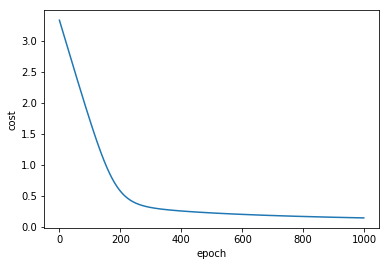

In [18]:
### Graph of Cost vs Epoch
plt.plot(cost_history)
plt.xlabel('epoch')
plt.ylabel('cost')

In [19]:
## Theta Value I took is from epoch=800
theta0=0.82257309 
theta1=0.49542164
theta2=-0.43099795
theta=np.array([theta0,theta1,theta2])

In [20]:
predict_y_tune=predict(X,theta)
#predict_y_tune

In [21]:
## Target Variable before stepping into Gradient descent
## If probablity more than or equal to .50 it is 1 and less than it is 0. 
y_hat=predict(X,theta)
for index,v in enumerate(y_hat):
    if v>=.50:
        y_hat[index]=1
    else:
        y_hat[index]=0

In [22]:
### After Tuning the theta
np.array([y_hat])

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]])

# Logistic Regression With sklearn

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X,y)

predict_y=clf.predict(X)

In [24]:
predict_y

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])